## Постановка задачи:

Данный датасет содержит данные по качеству красного вина.

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Классификацию будем проводить по оценкам качества.

Установливаем библиотеку Pandas:

In [139]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Импортируем необходимые модули:

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [141]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Выводим первые 10 строк dataset-а:

In [142]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Выводим последние 10 строк dataset-а:

In [143]:
data.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### О наборе данных:
Simple and clean practice dataset for regression or classification modelling
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Content
For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)


Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [144]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'fixed acidity'], end="\n\n")
print(data["fixed acidity"][2], end="\n\n")
print(data["fixed acidity"].dtype, end="\n\n")
print(type(data["fixed acidity"]), end="\n\n")
print(type(data["fixed acidity"][2]), end="\n\n")

(1599, 12)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

RangeIndex(start=0, stop=1599, step=1)

7.8

7.8

float64

<class 'pandas.core.series.Series'>

<class 'numpy.float64'>



Выведем описательную статистику по нашему dataset-у:

In [145]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [146]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Выведем матрицу корреляции наших численных признаков:

In [147]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Сделаем названия колонок более логичными, добавив "_"

In [148]:
data.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)

In [149]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [150]:
data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [151]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


<AxesSubplot: xlabel='quality', ylabel='count'>

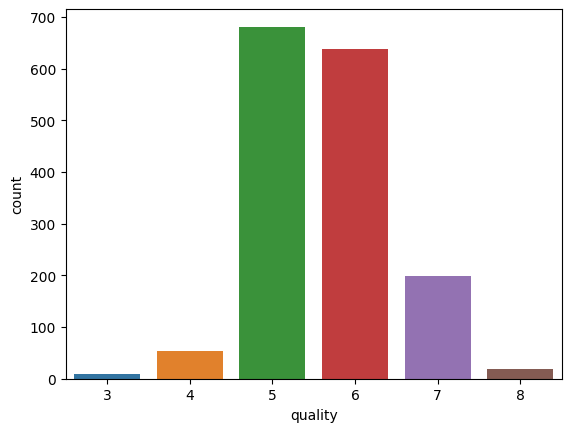

In [152]:
sns.countplot(x='quality',data=data)

Распределение классов неравномерное

Визуализируем матрицу корреляции

<AxesSubplot: >

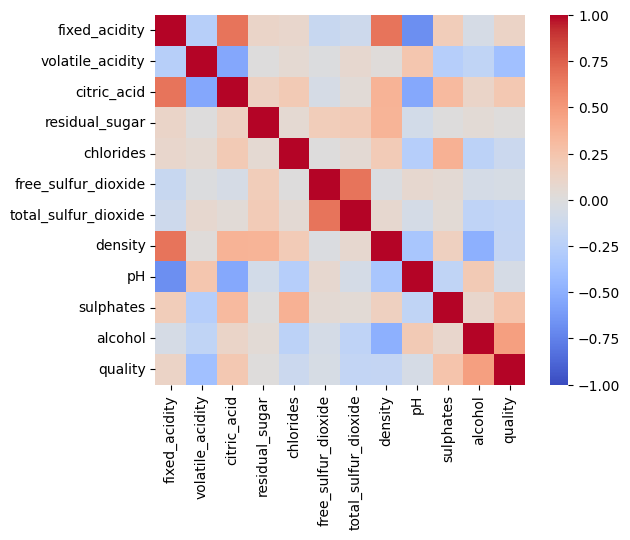

In [153]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Наблюдается средняя корреляция

Визуализируем некоторые графики корреляции:

<AxesSubplot: xlabel='quality', ylabel='sulphates'>

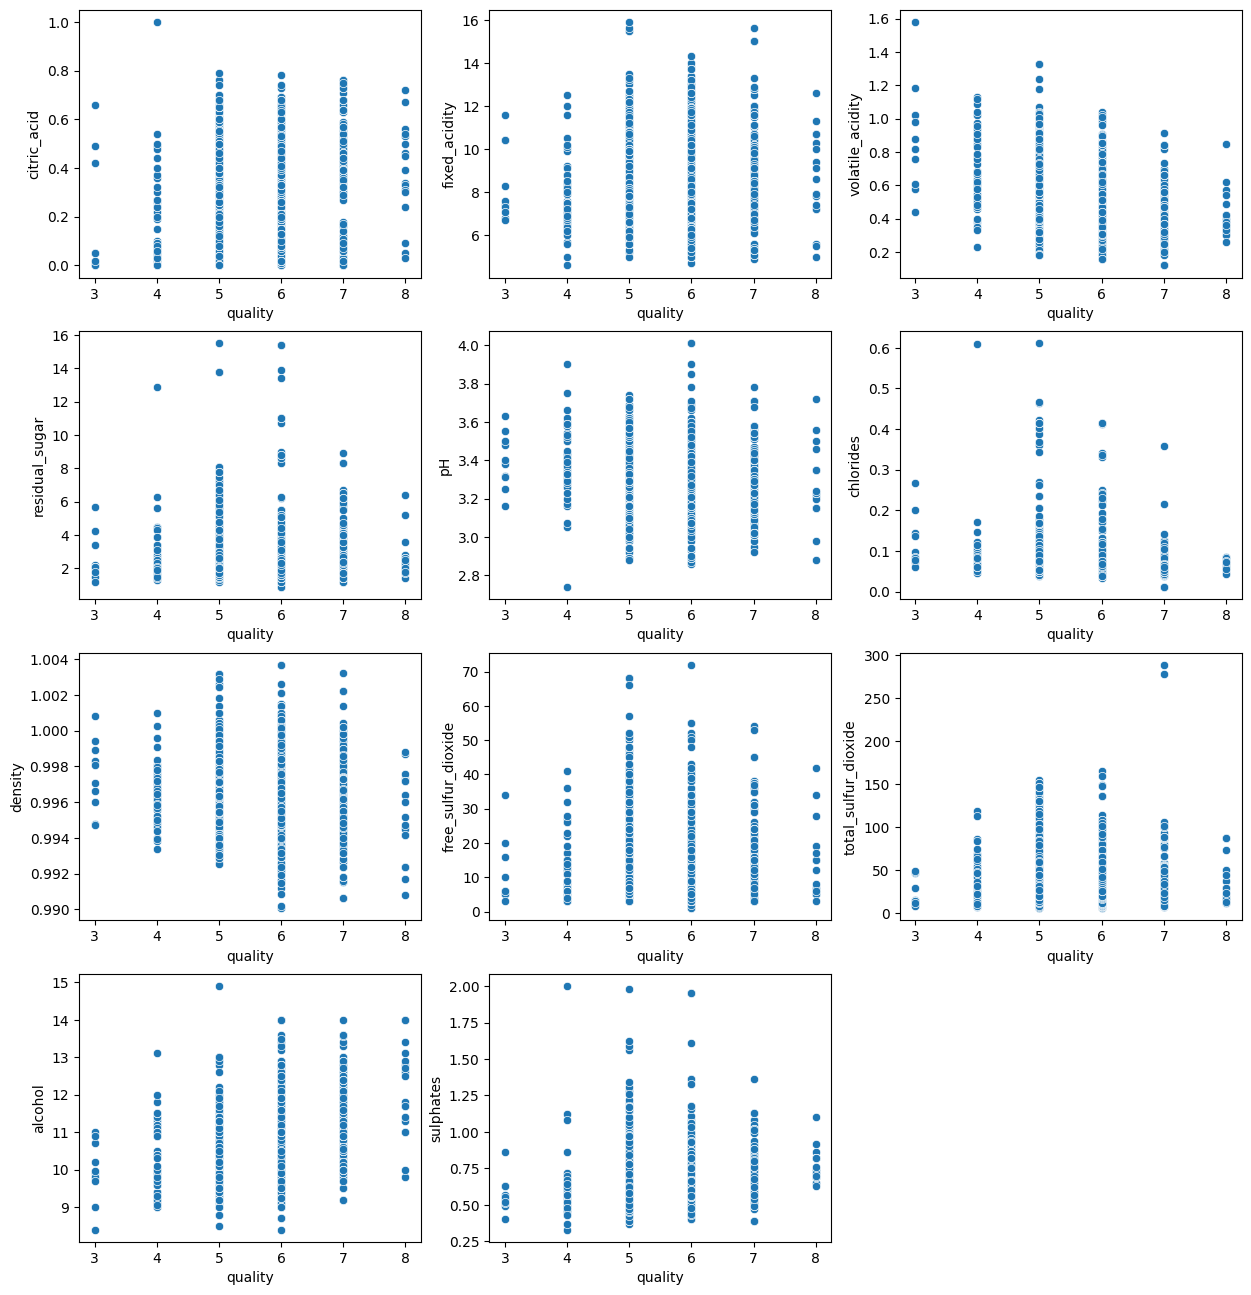

In [154]:
plt.figure(figsize=(15,16))
plt.subplot(4, 3, 1)
sns.scatterplot(x='quality',y="citric_acid",data=data)

plt.subplot(4, 3, 2)
sns.scatterplot(x='quality',y="fixed_acidity",data=data)

plt.subplot(4, 3, 3)
sns.scatterplot(x='quality',y="volatile_acidity",data=data)

plt.subplot(4, 3, 4)
sns.scatterplot(x='quality',y="residual_sugar",data=data)

plt.subplot(4, 3, 5)
sns.scatterplot(x='quality',y="pH",data=data)

plt.subplot(4, 3, 6)
sns.scatterplot(x='quality',y="chlorides",data=data)

plt.subplot(4, 3, 7)
sns.scatterplot(x='quality',y="density",data=data)

plt.subplot(4, 3, 8)
sns.scatterplot(x='quality',y="free_sulfur_dioxide",data=data)

plt.subplot(4, 3, 9)
sns.scatterplot(x='quality',y="total_sulfur_dioxide",data=data)

plt.subplot(4, 3, 10)
sns.scatterplot(x='quality',y="alcohol",data=data)
plt.subplot(4, 3, 11)
sns.scatterplot(x='quality',y="sulphates",data=data)

In [155]:
corr_mat['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

Как мы видим, самую большую корреляцию с качеством имеет алкоголь.
Рассмотрим влияние признаков подробнее.

<AxesSubplot: xlabel='quality', ylabel='alcohol'>

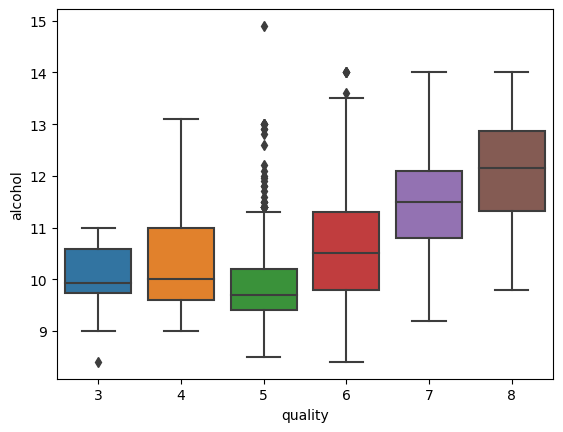

In [156]:
sns.boxplot(x="quality",y="alcohol",data=data)

<AxesSubplot: xlabel='quality', ylabel='sulphates'>

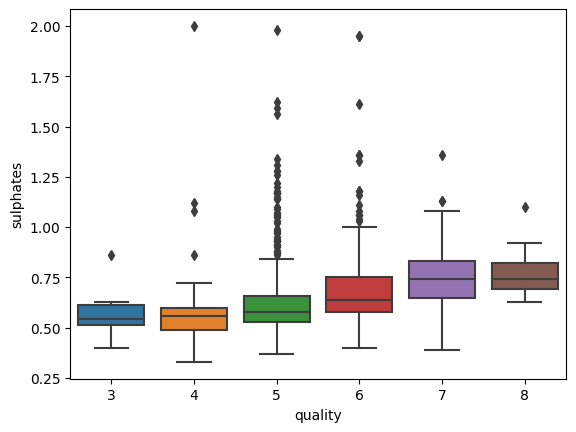

In [157]:
sns.boxplot(x="quality",y="sulphates",data=data)

<AxesSubplot: xlabel='quality', ylabel='citric_acid'>

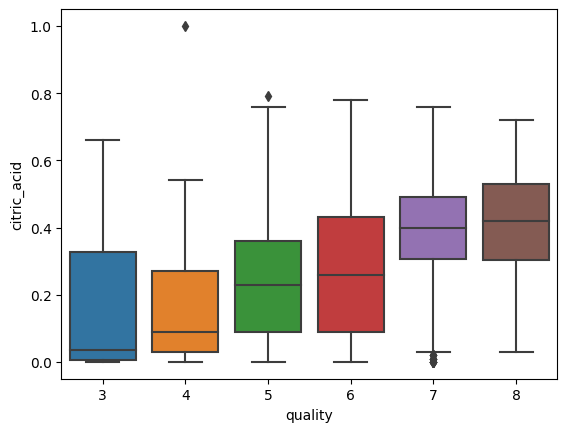

In [158]:
sns.boxplot(x="quality",y="citric_acid",data=data)

<AxesSubplot: xlabel='quality', ylabel='volatile_acidity'>

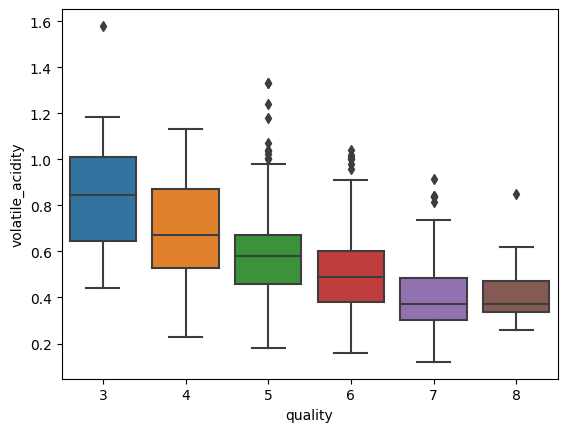

In [159]:
sns.boxplot(x="quality",y="volatile_acidity",data=data)

## Готовим данные

Проверим данные на отсутствующие значения.

In [160]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Как видим, данные без пропущенных значений.

Избавимся от выбросов:

In [161]:
rows_to_drop = data[
    (data['citric_acid'] > data['citric_acid'].quantile(0.90)) |
    (data['residual_sugar'] > data['residual_sugar'].quantile(0.90)) | 
    (data['chlorides'] > data['chlorides'].quantile(0.90)) | 
    (data['total_sulfur_dioxide'] > data['total_sulfur_dioxide'].quantile(0.90)) |
    (data['alcohol'] > data['alcohol'].quantile(0.90)) |
    (data['sulphates'] > data['sulphates'].quantile(0.90))].index
data = data.drop(rows_to_drop)
data.shape

(942, 12)

<AxesSubplot: xlabel='quality', ylabel='sulphates'>

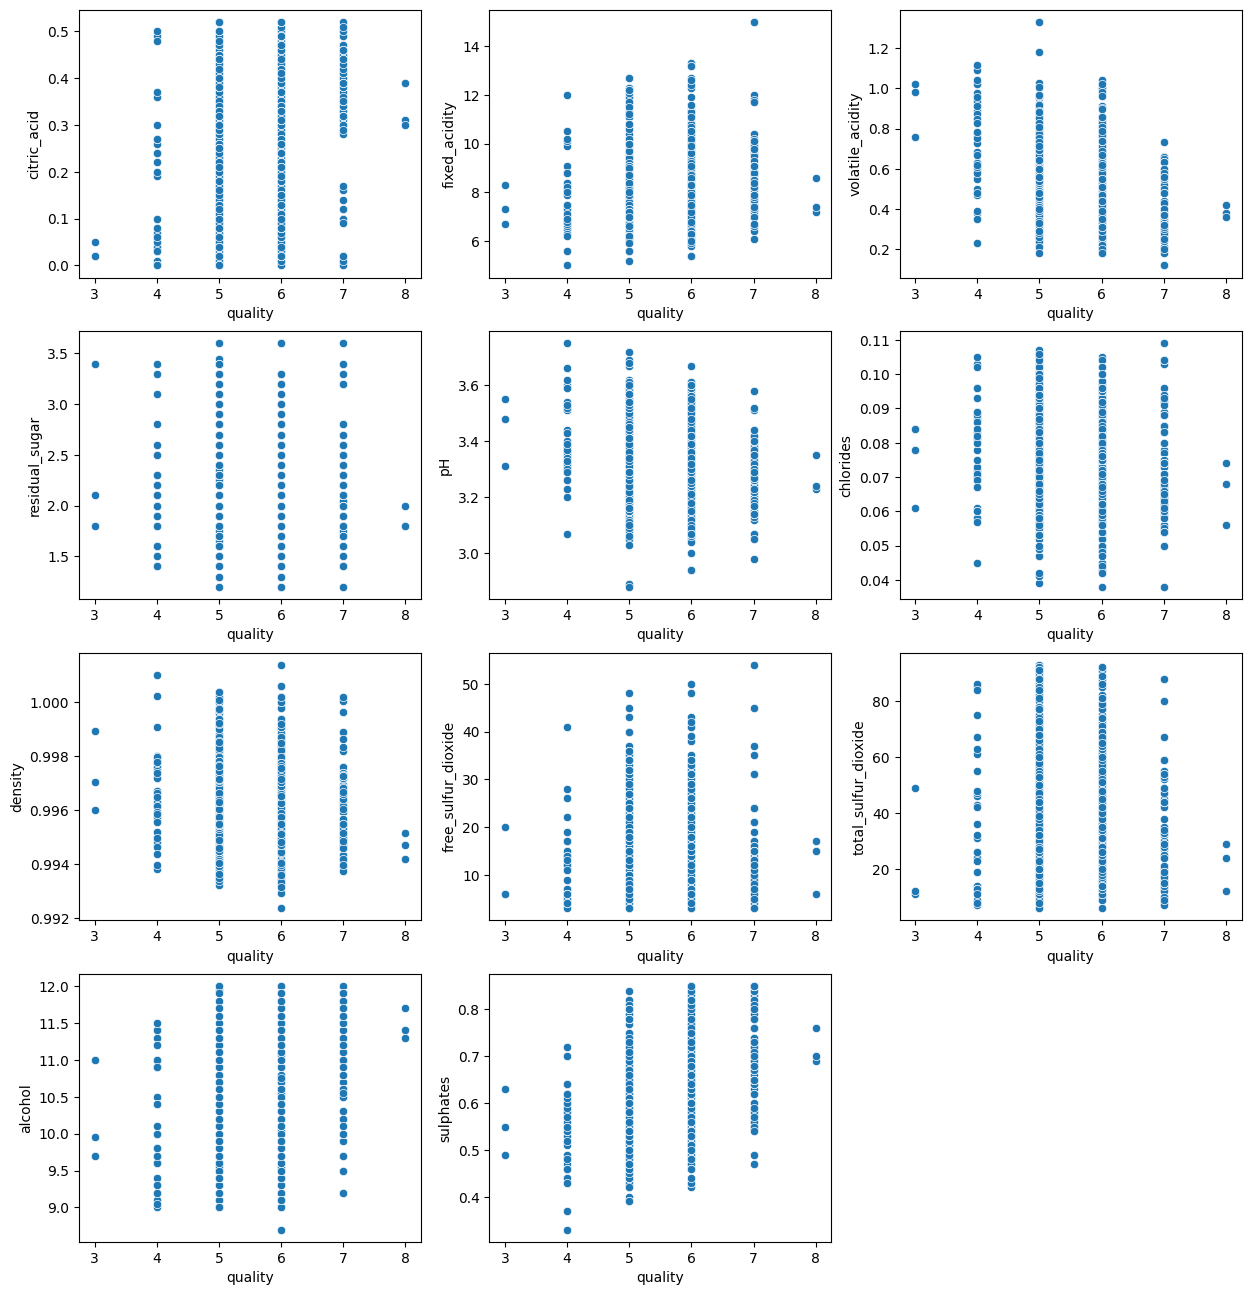

In [162]:
plt.figure(figsize=(15,16))
plt.subplot(4, 3, 1)
sns.scatterplot(x='quality',y="citric_acid",data=data)

plt.subplot(4, 3, 2)
sns.scatterplot(x='quality',y="fixed_acidity",data=data)

plt.subplot(4, 3, 3)
sns.scatterplot(x='quality',y="volatile_acidity",data=data)

plt.subplot(4, 3, 4)
sns.scatterplot(x='quality',y="residual_sugar",data=data)

plt.subplot(4, 3, 5)
sns.scatterplot(x='quality',y="pH",data=data)

plt.subplot(4, 3, 6)
sns.scatterplot(x='quality',y="chlorides",data=data)

plt.subplot(4, 3, 7)
sns.scatterplot(x='quality',y="density",data=data)

plt.subplot(4, 3, 8)
sns.scatterplot(x='quality',y="free_sulfur_dioxide",data=data)

plt.subplot(4, 3, 9)
sns.scatterplot(x='quality',y="total_sulfur_dioxide",data=data)

plt.subplot(4, 3, 10)
sns.scatterplot(x='quality',y="alcohol",data=data)
plt.subplot(4, 3, 11)
sns.scatterplot(x='quality',y="sulphates",data=data)

Заменим признак качества на признак рейтинг с двумя значениями: хорошее вино и плохое вино.

In [163]:
data['rating'] = data.quality.apply(lambda x : 'good' if x > 5 else 'bad')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad


In [164]:
data['rating'] = data.rating.map({'good':1, 'bad': 0})

In [165]:
data.drop('quality', 1, inplace=True)

C:\Users\nick\AppData\Local\Temp\ipykernel_18352\318131060.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('quality', 1, inplace=True)


In [166]:
data.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,0


Разбиваем наши данные на y и x:

In [167]:
X = data.drop('rating', axis = 1)
y = data['rating']
feature_names = X.columns
print(feature_names)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [168]:
X=X.to_numpy()
y=y.to_numpy()

In [169]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]

[0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1
 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1
 0 0 1 0 1 0 0 0 1 0 1 0

Разделим наш dataset на обучающую и тестовую выборку:

In [170]:
import sys
!{sys.executable} -m pip install scikit-learn

'c:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

659 283 (659,) (283,)


Оказалось, что наши данные содержат незначительное количество полей типа nan. Заменим их на данные из других строк таблицы (таких значения всего 4, на общую картину это никак не повлияет):

In [172]:
print(np.argwhere(np.isnan(X_train)))
for i, j in np.argwhere(np.isnan(X_train)):
    X_train[i][j] = X_train[0][j]

print(np.argwhere(np.isnan(X_test)))
for i, j in np.argwhere(np.isnan(X_test)):
    X_test[i][j] = X_test[0][j]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[]
[]
(659, 11)
(659,)
(283, 11)
(283,)


Интерпретируем все значения `y` как целые числа:

In [173]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [174]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [175]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [176]:
print(f"{err_train}")
print(f"{err_test}")

0.30652503793626706
0.45229681978798586


In [177]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[259  63]
 [139 198]]

[[92 46]
 [82 63]]



Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

In [178]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

Лучший результат достигается при n=3:

In [179]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.2291350531107739
0.43109540636042404


## Другие алгоритмы обучения:

### SVC (работает очень, очень медленно):

In [180]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.16995447647951442
0.36395759717314485


### Random Forest:

In [181]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0
0.1978798586572438


### Extremely Randomized Trees:

In [182]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0
0.19434628975265017


### AdaBoost (работает очень медленно):

In [183]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.009104704097116844
0.2826855123674912


### GBT (работает очень, очень медленно):

In [184]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(f"{err_train}")
print(f"{err_test}")

0.0
0.26501766784452296


Наилуший результат показывает Extremely Randomized Trees и GBT. Ошибка на тестовой выборке состовляет ~ 0.194. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.
